In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt 
import descartes
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
from urllib.request import urlopen
import scipy.optimize
import random
from collections import defaultdict
import datetime
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Import Data

In [3]:
path = '/content/drive/My Drive/Colab Notebooks/airbnb_pathrise/'

df = pd.read_csv(path+"listings.csv")
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,NaN,NaN,https://a0.muscache.com/im/pictures/10272854/8...,NaN,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,...,$20.00,3,15,3,3,15,15,3.0,15.0,today,t,8,18,43,89,2019-08-09,267,30,2009-03-30,2019-08-05,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,NaN,NaN,https://a0.muscache.com/im/pictures/69979664/3...,NaN,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/579c8...,https://a0.muscache.com/im/pictures/user/579c8...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-Oost,...,$0.00,1,1000,1,4,1000,1000,3.4,1000.0,today,t,0,8,34,124,2019-08-09,283,67,2010-03-02,2019-07-26,88.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
2,25428,https://www.airbnb.com/rooms/25428,20190808195507,2019

In [4]:
print(df.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)


In [5]:
len(df)

20677

# Exploratory Data Analysis and Data Cleaning

In [6]:
df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.067700e+04,2.067700e+04,0.0,0.0,0.0,2.067700e+04,0.0,20665.000000,20665.000000,0.0,20677.000000,20677.000000,20677.000000,20671.000000,20669.000000,20669.000000,386.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,17861.00000,17850.000000,17852.000000,17840.000000,17847.000000,17842.000000,17842.000000,20677.000000,20677.000000,20677.000000,20677.000000,18084.000000
mean,1.791013e+07,2.019081e+13,NaN,NaN,NaN,5.666981e+07,NaN,7.010888,7.010888,NaN,52.365278,4.889565,2.879335,1.158580,1.454400,1.829213,548.435233,1.459351,3.546694,617.663297,3.516371,3.838129,602.894472,611.190937,3.653485,606.781022,3.783479,7.686173,12.423321,54.104609,23.290323,6.998597,94.97962,9.687283,9.469079,9.735762,9.789488,9.476124,9.177054,4.925134,4.492431,0.410988,0.021715,0.987736
std,1.041987e+07,7.800970e+00,NaN,NaN,NaN,6.812902e+07,NaN,37.729548,37.729548,NaN,0.016353,0.035970,1.314935,0.380091,0.894856,1.407580,555.655913,0.935662,18.690394,537.978553,18.688704,18.874855,538.915327,537.842556,18.759495,536.703416,7.219078,14.491902,22.936166,99.488601,48.619730,14.239550,6.63050,0.693180,0.867372,0.654358,0.610074,0.707655,0.808275,22.883678,22.710906,1.082794,0.237805,1.349155
min,2.818000e+03,2.019081e+13,NaN,NaN,NaN,3.159000e+03,NaN,0.000000,0.000000,NaN,52.289270,4.753120,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.340207e+06,2.019081e+13,NaN,NaN,NaN,8.795077e+06,NaN,1.000000,1.000000,NaN,52.355130,4.863870,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,21.000000,2.000000,2.000000,20.000000,21.000000,2.000000,21.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,93.00000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.240000
50%,1.774427e+07,2.019081e+13,NaN,NaN,NaN,2.618942e+07,NaN,1.000000,1.000000,NaN,52.364620,4.887030,2.000000,1.000000,1.000000,1.000000,484.000000,1.000000,2.000000,1125.000000,2.000000,3.000000,1124.000000,1124.000000,2.300000,1124.000000,0.000000,0.000000,0.000000,1.000000,9.000000,2.000000,97.00000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.540000
75%,2.601974e+07,2.019081e+13,NaN,NaN,NaN,7.754037e+07,NaN,2.000000,2.000000,NaN,52.375190,4.909260,4.000000,1.000000,2.000000,2.000000,861.000000,2.000000,3.000000,1125.000000,3.000000,4.000000,1125.000000,1125.000000,3.000000,1125.000000,4.000000,8.000000,13.000000,50.000000,23.000000,7.000000,100.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,0.000000,1.070000
max,3.759099e+07,2.019081e+13,NaN,NaN,NaN,2.839422e+08,NaN,980.000000,980.000000,NaN,52.424710,5.027690,30.000000,15.000000,12.000000,32.000000,3229.000000,16.000000,1001.000000,1825.000000,1001.00

In [7]:
df['host_response_time'].value_counts()

within an hour        6217
within a few hours    3016
within a day          2570
a few days or more     333
Name: host_response_time, dtype: int64

In [8]:
df['host_is_superhost'].value_counts()

f    17451
t     3214
Name: host_is_superhost, dtype: int64

In [9]:
df['cancellation_policy'].value_counts()

strict_14_with_grace_period    8003
moderate                       7492
flexible                       5043
super_strict_60                 112
super_strict_30                  26
Name: cancellation_policy, dtype: int64

In [10]:
df['host_identity_verified'].value_counts()

f    12602
t     8063
Name: host_identity_verified, dtype: int64

In [11]:
df['instant_bookable'].value_counts()

f    15226
t     5451
Name: instant_bookable, dtype: int64

In [12]:
df['price'].describe()

count       20677
unique        462
top       $150.00
freq         1364
Name: price, dtype: object

In [13]:
for f in df.columns:
  if df[f].isna().sum() != 0:
         print(f + ': ' + str(df[f].isna().sum()))

name: 35
summary: 629
space: 5422
description: 219
neighborhood_overview: 6584
notes: 11523
transit: 6302
access: 8468
interaction: 7988
house_rules: 7883
thumbnail_url: 20677
medium_url: 20677
xl_picture_url: 20677
host_name: 12
host_since: 12
host_location: 49
host_about: 8600
host_response_time: 8541
host_response_rate: 8541
host_acceptance_rate: 20677
host_is_superhost: 12
host_thumbnail_url: 12
host_picture_url: 12
host_neighbourhood: 5937
host_listings_count: 12
host_total_listings_count: 12
host_has_profile_pic: 12
host_identity_verified: 12
neighbourhood: 831
neighbourhood_group_cleansed: 20677
city: 4
state: 219
zipcode: 886
market: 40
bathrooms: 6
bedrooms: 8
beds: 8
square_feet: 20291
weekly_price: 18086
monthly_price: 19269
security_deposit: 6202
cleaning_fee: 3721
first_review: 2593
last_review: 2593
review_scores_rating: 2816
review_scores_accuracy: 2827
review_scores_cleanliness: 2825
review_scores_checkin: 2837
review_scores_communication: 2830
review_scores_location: 2

In [14]:
listings = df[['id', 'last_scraped', 'host_since', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'longitude', 'latitude',
               'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit',
               'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'first_review', 'last_review', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_cleanliness', 
               'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 
               'require_guest_phone_verification', 'calculated_host_listings_count']]
listings.head()

,id,last_scraped,host_since,host_is_superhost,host_has_profile_pic,host_identity_verified,longitude,latitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,first_review,last_review,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,2818,2019-08-09,2008-09-24,t,t,f,4.94142,52.36575,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",$59.00,$200.00,$60.00,1,$20.00,3,2009-03-30,2019-08-05,267,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,f,f,1
1,20168,2019-08-09,2009-12-02,f,t,f,4.89354,52.36509,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",$80.00,NaN,NaN,2,$0.00,1,2010-03-02,2019-07-26,283,9.0,10.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,2
2,25428,2019-08-09,2009-11-20,f,t,f,4.88339,52.37297,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",$125.00,$300.00,$40.00,2,$10.00,14,2018-01-21,2019-05-11,3,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2
3,27886,2019-08-09,2010-03-23,t,t,t,4.89208,52.38673,Houseboat,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",$150.00,$0.00,$0.00,1,$0.00,2,2012-01-09,2019-07-01,195,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,f,f,1
4,28871,2019-08-09,2010-05-13,t,t,t,4.89092,52.36719,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Pets live on this property"",Ca...",$75.00,NaN,NaN,1,$0.00,2,2010-08-22,2019-07-20,283,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,3


In [15]:
listings = listings[listings['number_of_reviews'] > 0]
len(listings)

18084

In [0]:
listings['security_deposit'].fillna(0, inplace=True)
listings['cleaning_fee'].fillna(0, inplace=True)
# listings['host_about'].fillna('', inplace=True)

In [17]:
for f in listings.columns:
  if listings[f].isna().sum() != 0:
         print(f + ': ' + str(listings[f].isna().sum()))

host_since: 10
host_is_superhost: 10
host_has_profile_pic: 10
host_identity_verified: 10
bathrooms: 5
bedrooms: 6
beds: 5
review_scores_accuracy: 235
review_scores_cleanliness: 233
review_scores_checkin: 245
review_scores_communication: 238
review_scores_location: 243
review_scores_value: 243


In [18]:
listings.dropna(inplace = True)
len(listings)

17811

In [0]:
listings['price'] = listings['price'].str.replace(',', '').replace('$', '')
listings['security_deposit'] = listings['security_deposit'].str.replace(',', '').replace('$', '')
listings['cleaning_fee'] = listings['cleaning_fee'].str.replace(',', '').replace('$', '')
listings['extra_people'] = listings['extra_people'].str.replace(',', '').replace('$', '')

listings['price'] = listings['price'].str.replace('$', '')
listings['security_deposit'] = listings['security_deposit'].str.replace('$', '')
listings['cleaning_fee'] = listings['cleaning_fee'].str.replace('$', '')
listings['extra_people'] = listings['extra_people'].str.replace('$', '')

listings['price'] = pd.to_numeric(listings['price'])
listings['security_deposit'] = pd.to_numeric(listings['security_deposit'])
listings['cleaning_fee'] = pd.to_numeric(listings['cleaning_fee'])
listings['extra_people'] = pd.to_numeric(listings['extra_people'])

listings['security_deposit'].fillna(0, inplace=True)
listings['cleaning_fee'].fillna(0, inplace=True)

In [0]:
listings['host_has_profile_pic'] = [0 if i == 'f' else 1 for i in listings['host_has_profile_pic']]
listings['host_is_superhost'] = [0 if i == 'f' else 1 for i in listings['host_is_superhost']]
listings['host_identity_verified'] = [0 if i == 'f' else 1 for i in listings['host_identity_verified']]
listings['instant_bookable'] = [0 if i == 'f' else 1 for i in listings['instant_bookable']]
listings['require_guest_profile_picture'] = [0 if i == 'f' else 1 for i in listings['require_guest_profile_picture']]
listings['require_guest_phone_verification'] = [0 if i == 'f' else 1 for i in listings['require_guest_phone_verification']]

In [22]:
listings.head()

,id,last_scraped,host_since,host_is_superhost,host_has_profile_pic,host_identity_verified,longitude,latitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,first_review,last_review,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,2818,2019-08-09,2008-09-24,1,1,0,4.94142,52.36575,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",59.0,200.0,60.0,1,20.0,3,2009-03-30,2019-08-05,267,10.0,10.0,10.0,10.0,10.0,10.0,1,strict_14_with_grace_period,0,0,1
1,20168,2019-08-09,2009-12-02,0,1,0,4.89354,52.36509,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",80.0,0.0,0.0,2,0.0,1,2010-03-02,2019-07-26,283,9.0,10.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,0,0,2
2,25428,2019-08-09,2009-11-20,0,1,0,4.88339,52.37297,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",125.0,300.0,40.0,2,10.0,14,2018-01-21,2019-05-11,3,10.0,10.0,10.0,10.0,10.0,10.0,0,strict_14_with_grace_period,0,0,2
3,27886,2019-08-09,2010-03-23,1,1,1,4.89208,52.38673,Houseboat,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",150.0,0.0,0.0,1,0.0,2,2012-01-09,2019-07-01,195,10.0,10.0,10.0,10.0,10.0,10.0,1,strict_14_with_grace_period,0,0,1
4,28871,2019-08-09,2010-05-13,1,1,1,4.89092,52.36719,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Pets live on this property"",Ca...",75.0,0.0,0.0,1,0.0,2,2010-08-22,2019-07-20,283,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,0,0,3


In [0]:
listings['last_review'] = pd.to_datetime(listings['last_review'])
listings['first_review'] = pd.to_datetime(listings['first_review'])
listings['host_since'] = pd.to_datetime(listings['host_since'])

listings['onlist_duration'] = listings['first_review'].rsub(listings['last_review'], axis=0).dt.days
listings['host_duration'] = listings['host_since'].rsub(listings['last_review'], axis=0).dt.days

In [0]:
def count_amenities(i):
  i = i.split(',')
  return len(i)

listings['amenities'] = listings['amenities'].apply(count_amenities)

In [0]:
listings['price_pp'] = listings['price']/listings['accommodates']

In [26]:
listings.head()

,id,last_scraped,host_since,host_is_superhost,host_has_profile_pic,host_identity_verified,longitude,latitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,first_review,last_review,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,onlist_duration,host_duration,price_pp
0,2818,2019-08-09,2008-09-24,1,1,0,4.94142,52.36575,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,36,59.0,200.0,60.0,1,20.0,3,2009-03-30,2019-08-05,267,10.0,10.0,10.0,10.0,10.0,10.0,1,strict_14_with_grace_period,0,0,1,3780,3967,29.500000
1,20168,2019-08-09,2009-12-02,0,1,0,4.89354,52.36509,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,19,80.0,0.0,0.0,2,0.0,1,2010-03-02,2019-07-26,283,9.0,10.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,0,0,2,3433,3523,40.000000
2,25428,2019-08-09,2009-11-20,0,1,0,4.88339,52.37297,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,23,125.0,300.0,40.0,2,10.0,14,2018-01-21,2019-05-11,3,10.0,10.0,10.0,10.0,10.0,10.0,0,strict_14_with_grace_period,0,0,2,475,3459,41.666667
3,27886,2019-08-09,2010-03-23,1,1,1,4.89208,52.38673,Houseboat,Private room,2,1.0,1.0,1.0,Real Bed,22,150.0,0.0,0.0,1,0.0,2,2012-01-09,2019-07-01,195,10.0,10.0,10.0,10.0,10.0,10.0,1,strict_14_with_grace_period,0,0,1,2730,3387,75.000000
4,28871,2019-08-09,2010-05-13,1,1,1,4.89092,52.36719,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,17,75.0,0.0,0.0,1,0.0,2,2010-08-22,2019-07-20,283,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,0,0,3,3254,3355,37.500000


In [0]:
listings.to_csv(path+'cleaned_listings.csv', index = False)

In [28]:
property_group = listings.groupby('property_type').agg({'price': ['mean', 'min', 'max']})
property_group

price                
                               mean     min     max
property_type                                      
Aparthotel               218.968254    97.0   618.0
Apartment                146.664308     0.0  8915.0
Barn                     237.500000    75.0   400.0
Bed and breakfast        130.838000    35.0   800.0
Boat                     196.795527    25.0   800.0
Boutique hotel           171.235294    79.0   865.0
Bungalow                  86.666667    65.0   100.0
Cabin                    106.666667    75.0   200.0
Camper/RV                 47.500000    35.0    60.0
Campsite                  50.000000    50.0    50.0
Casa particular (Cuba)    85.000000    70.0   100.0
Castle                   550.000000   550.0   550.0
Chalet                    84.333333    80.0    90.0
Condominium              142.000000    30.0   540.0
Cottage                  173.555556    26.0   500.0
Dome house               195.000000   195.0   195.0
Earth house               80.000000    80.0    80.0
Guest suite              124.292857    50.0   550.0
Guesthouse               147.088889    49.0   800.0
Hostel                   410.000000    20.0  1000.0
Hotel                    364.857143    69.0  1000.0
House                    171.962082    23.0  1195.0
Houseboat                206.395437    50.0  1390.0
Hut                       40.000000    40.0    40.0
Island                    75.000000    75.0    75.0
Lighthouse              4500.000000  4500.0  4500.0
Loft                     208.294766    30.0  1000.0
Nature lodge             140.000000   140.0   140.0
Other                    116.178571    40.0   330.0
Serviced apartment       243.217391    65.0   900.0
Tent                      25.000000    25.0    25.0
Tiny house                96.700000    52.0   165.0
Townhouse                188.052817    40.0  2000.0
Villa                    223.393939    62.0   435.0

In [29]:
temp = list(range(0, len(property_group)))
t = property_group.index
pro_type = pd.DataFrame(zip(t, temp), columns = ['property_type', 'property_index'])
pro_type

,property_type,property_index
0,Aparthotel,0
1,Apartment,1
2,Barn,2
3,Bed and breakfast,3
4,Boat,4
5,Boutique hotel,5
6,Bungalow,6
7,Cabin,7
8,Camper/RV,8
9,Campsite,9


In [30]:
listings = pd.merge(listings,
                 pro_type,
                 on='property_type', 
                 how='left')
listings.head()

,id,last_scraped,host_since,host_is_superhost,host_has_profile_pic,host_identity_verified,longitude,latitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,first_review,last_review,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,onlist_duration,host_duration,price_pp,property_index
0,2818,2019-08-09,2008-09-24,1,1,0,4.94142,52.36575,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,36,59.0,200.0,60.0,1,20.0,3,2009-03-30,2019-08-05,267,10.0,10.0,10.0,10.0,10.0,10.0,1,strict_14_with_grace_period,0,0,1,3780,3967,29.500000,1
1,20168,2019-08-09,2009-12-02,0,1,0,4.89354,52.36509,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,19,80.0,0.0,0.0,2,0.0,1,2010-03-02,2019-07-26,283,9.0,10.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,0,0,2,3433,3523,40.000000,32
2,25428,2019-08-09,2009-11-20,0,1,0,4.88339,52.37297,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,23,125.0,300.0,40.0,2,10.0,14,2018-01-21,2019-05-11,3,10.0,10.0,10.0,10.0,10.0,10.0,0,strict_14_with_grace_period,0,0,2,475,3459,41.666667,1
3,27886,2019-08-09,2010-03-23,1,1,1,4.89208,52.38673,Houseboat,Private room,2,1.0,1.0,1.0,Real Bed,22,150.0,0.0,0.0,1,0.0,2,2012-01-09,2019-07-01,195,10.0,10.0,10.0,10.0,10.0,10.0,1,strict_14_with_grace_period,0,0,1,2730,3387,75.000000,22
4,28871,2019-08-09,2010-05-13,1,1,1,4.89092,52.36719,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,17,75.0,0.0,0.0,1,0.0,2,2010-08-22,2019-07-20,283,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,0,0,3,3254,3355,37.500000,1


In [31]:
room_group = listings.groupby('room_type').agg({'price': ['mean', 'min', 'max']})
room_group

price              
                       mean   min     max
room_type                                
Entire home/apt  166.307234   0.0  8915.0
Private room     104.003010  19.0  1000.0
Shared room      171.271429  15.0  1000.0

In [0]:
def room(t):
  if t == 'Entire home/apt':
    return 0
  elif t == 'Private room':
    return 1
  else:
    return 2

listings['room_type'] = listings['room_type'].apply(room).astype('category')

In [33]:
cancel_group = listings.groupby('cancellation_policy').agg({'price': ['mean', 'min', 'max']})
cancel_group

price               
                                   mean    min     max
cancellation_policy                                   
flexible                     137.440771    9.0  5040.0
moderate                     147.343929   24.0  8000.0
strict_14_with_grace_period  166.101971    0.0  8915.0
super_strict_30              382.047619   99.0  1000.0
super_strict_60              310.925926  125.0   850.0

In [0]:
def cancel(t):
  if t == 'flexible':
    return 0
  elif t == 'moderate':
    return 1
  if t == 'strict_14_with_grace_period':
    return 2
  elif t == 'super_strict_30':
    return 3
  else:
    return 4

listings['cancellation_policy'] = listings['cancellation_policy'].apply(cancel).astype('category')

In [35]:
bed_group = listings.groupby('bed_type').agg({'price': ['mean', 'min', 'max']})
bed_group

price              
                     mean   min     max
bed_type                               
Airbed         120.538462  41.0   300.0
Couch           78.750000  44.0   130.0
Futon          100.641026  40.0   250.0
Pull-out Sofa   99.688073  25.0   400.0
Real Bed       154.035645   0.0  8915.0

In [0]:
def bed(t):
  if t == 'Airbed':
    return 0
  elif t == 'Couch':
    return 1
  if t == 'Futon':
    return 2
  elif t == 'Pull-out Sofa	':
    return 3
  else:
    return 4

listings['bed_type'] = listings['bed_type'].apply(bed).astype('category')

In [0]:
listings['property_index'] = listings['property_index'].astype('category')
listings['host_is_superhost'] = listings['host_is_superhost'].astype('category')
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].astype('category')
listings['host_identity_verified'] = listings['host_identity_verified'].astype('category')

In [38]:
listings.dtypes

id                                           int64
last_scraped                                object
host_since                          datetime64[ns]
host_is_superhost                         category
host_has_profile_pic                      category
host_identity_verified                    category
longitude                                  float64
latitude                                   float64
property_type                               object
room_type                                 category
accommodates                                 int64
bathrooms                                  float64
bedrooms                                   float64
beds                                       float64
bed_type                                  category
amenities                                    int64
price                                      float64
security_deposit                           float64
cleaning_fee                               float64
guests_included                

In [39]:
listings.columns

Index(['id', 'last_scraped', 'host_since', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'longitude',
       'latitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'first_review', 'last_review', 'number_of_reviews',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'onlist_duration', 'host_duration', 'price_pp', 'property_index'],
      dtype='object')

In [0]:
listings = listings.drop('property_type', axis = 1)
listings = listings.drop('last_scraped', axis = 1)
listings = listings.drop('host_since', axis = 1)
listings = listings.drop('first_review', axis = 1)
listings = listings.drop('last_review', axis = 1)

In [46]:
listings.head()

,id,host_is_superhost,host_has_profile_pic,host_identity_verified,longitude,latitude,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,onlist_duration,host_duration,price_pp,property_index
0,2818,1,1,0,4.94142,52.36575,1,2,1.5,1.0,2.0,4,36,59.0,200.0,60.0,1,20.0,3,267,10.0,10.0,10.0,10.0,10.0,10.0,1,2,0,0,1,3780,3967,29.500000,1
1,20168,0,1,0,4.89354,52.36509,1,2,1.0,1.0,1.0,4,19,80.0,0.0,0.0,2,0.0,1,283,9.0,10.0,10.0,10.0,10.0,9.0,0,2,0,0,2,3433,3523,40.000000,32
2,25428,0,1,0,4.88339,52.37297,0,3,1.0,1.0,1.0,4,23,125.0,300.0,40.0,2,10.0,14,3,10.0,10.0,10.0,10.0,10.0,10.0,0,2,0,0,2,475,3459,41.666667,1
3,27886,1,1,1,4.89208,52.38673,1,2,1.0,1.0,1.0,4,22,150.0,0.0,0.0,1,0.0,2,195,10.0,10.0,10.0,10.0,10.0,10.0,1,2,0,0,1,2730,3387,75.000000,22
4,28871,1,1,1,4.89092,52.36719,1,2,1.0,1.0,1.0,4,17,75.0,0.0,0.0,1,0.0,2,283,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,0,3,3254,3355,37.500000,1


In [47]:
listings.dropna(inplace = True)
len(listings)

17811

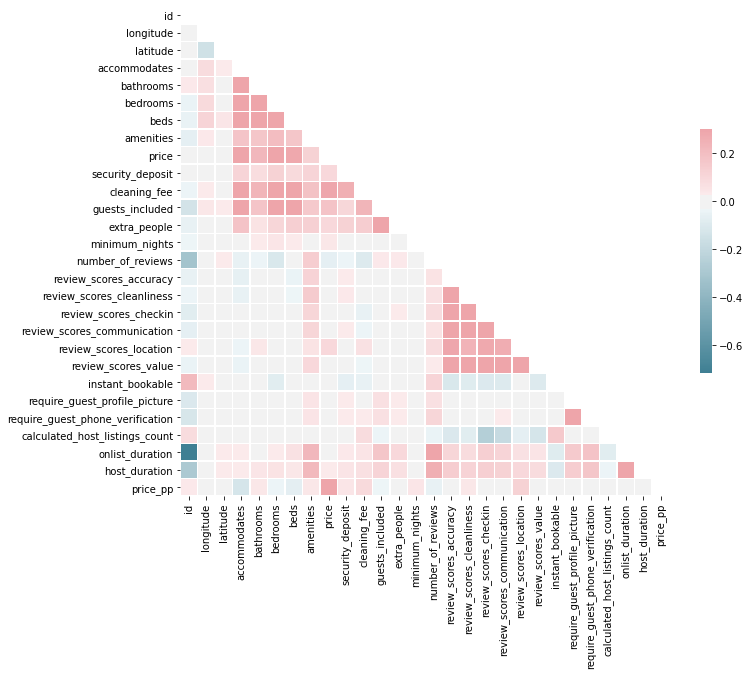

In [48]:
# Compute the correlation matrix
corr = listings.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Regression Model

In [49]:
X = listings[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'number_of_reviews', 
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'review_scores_location', 'cancellation_policy',
      'host_duration', 'price_pp', 'property_index']]

# X = listings[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
#       'room_type', 'accommodates', 'bathrooms',
#        'bedrooms', 'beds', 'bed_type', 'amenities',
#        'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
#        'minimum_nights', 'number_of_reviews',
#        'review_scores_accuracy', 'review_scores_cleanliness',
#        'review_scores_checkin', 'review_scores_communication',
#        'review_scores_location', 'review_scores_value', 'instant_bookable',
#        'cancellation_policy', 'require_guest_profile_picture',
#        'require_guest_phone_verification', 'calculated_host_listings_count',
#        'onlist_duration', 'host_duration', 'price_pp', 'property_index']]

y = listings[['price']]

print(X.shape)
print(y.shape)

(17811, 21)
(17811, 1)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
pred = logisticRegr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
rmse

83.43882050202757

In [53]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [54]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
rmse

11.499594053775457

In [55]:
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
rmse = np.sqrt(mse)
rmse

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6.905685309832019